In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from DF_functions import mean_msd,covariance_msd,theoretical_mean_msd,theoretical_covariance,Michalet
from functions import data_pool,NormMSDSlopeError,NormMSDInterceptError,NormMSDSlopeError_exp,NormMSDInterceptError_exp,fix_heatmap
from sklearn.linear_model import LinearRegression

%matplotlib inline
%reload_ext autoreload

def generate_csv(filenames):
    for filename in filenames:
        data = pd.read_csv(filename)
        data['x'] = data['x'].map(lambda xx: 0.133*xx)
        data['y'] = data['y'].map(lambda yy: 0.133*yy)
        data = data.rename(columns={'Trajectory': 'TRACK_ID','x': 'POSITION_X','y': 'POSITION_Y'})
        data.to_csv(filename, index=False)



dt = 0.05
minframe=10
maxframe=500
rsquared_threshold=0.9

#generate_csv(['Data/sm3_wnt.csv'])

#DATA = data_pool(['Data/sm1_wnt.csv','Data/sm2_wnt.csv','Data/sm3_wnt.csv'],dt,minframe,maxframe,rsquared_threshold,fit_option="thirty_percent")

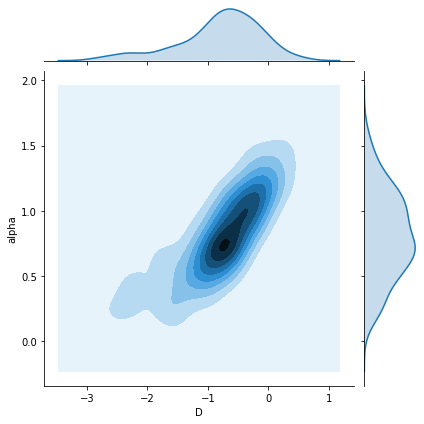

In [85]:
df = pd.DataFrame(DATA,columns=['alpha', 'D', 'c','N','ID','x','y','MSD','Filename'])
df['D'] = df['D'].map(lambda d: np.log10(d))

sns.jointplot(x="D", y="alpha", data=df,kind='kde')

In [92]:
files = ['Data/SM2_WNT/sm2_wnt_ld400.csv','Data/SM3_WNT/sm3_wnt_ld400.csv','Data/SM1_WNT/sm1_wnt_ld400.csv']
data2 = data_pool(files,dt,minframe,maxframe,rsquared_threshold,fit_option="thirty_percent")
df2 = pd.DataFrame(data2,columns=['alpha', 'D', 'c','N','ID','x','y','MSD','Filename'])
df2['D'] = df2['D'].map(lambda d: np.log10(d))

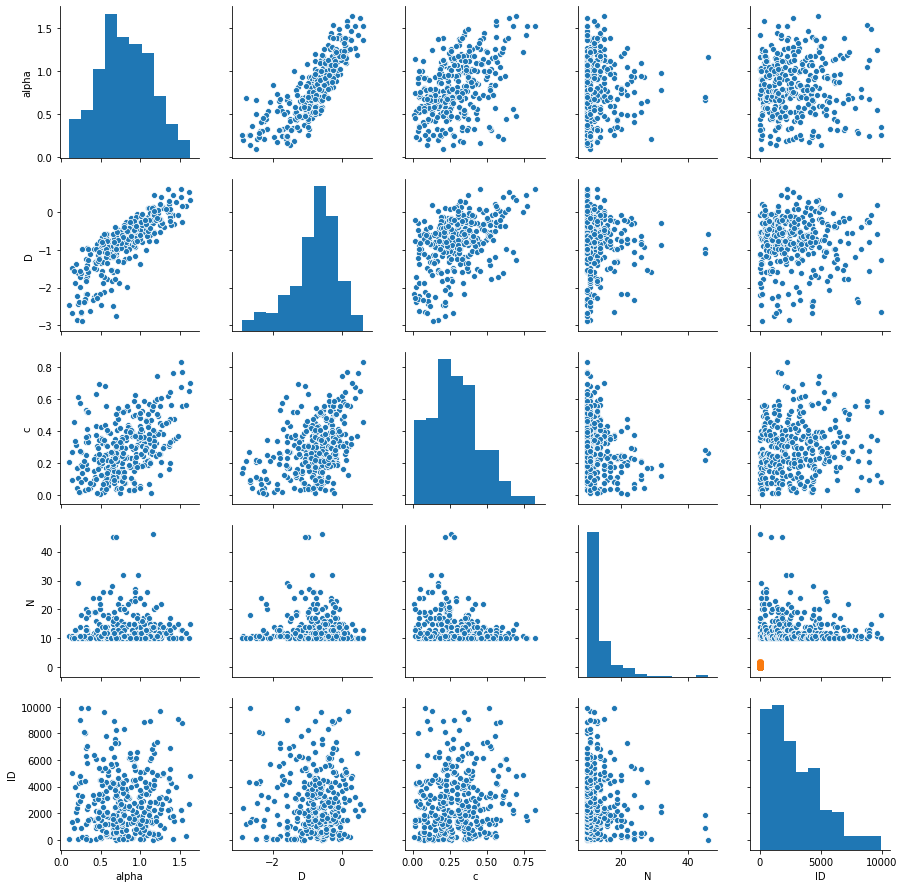

In [96]:
D1 = df['D'].values
alpha1 = df['alpha'].values
D2 = df2['D'].values
alpha2 = df2['alpha'].values

sns.pairplot(data=df)
plt.scatter(D1,alpha1)
plt.scatter(D2,alpha2,alpha=0.2)

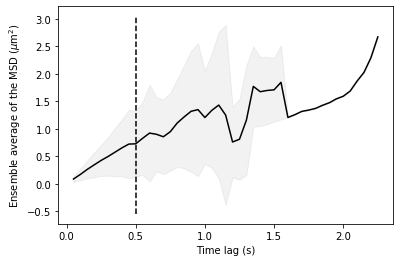

Initial run to determine the best theoretical values for D and sigma.
It is estimated that the lowest error will be for a number of fitting points P =  6  for which the relative error sigma/b =  4.092408110361275
D =  0.4138
It is estimated that the lowest error will be when the number of fitting points P =  5  for which the relative error sigmaa/a =  0.06568695501629133
sigma =  0.0317
Second run with accurate values for D and sigma.
D =  0.4138
sigma =  0.0317
Done.


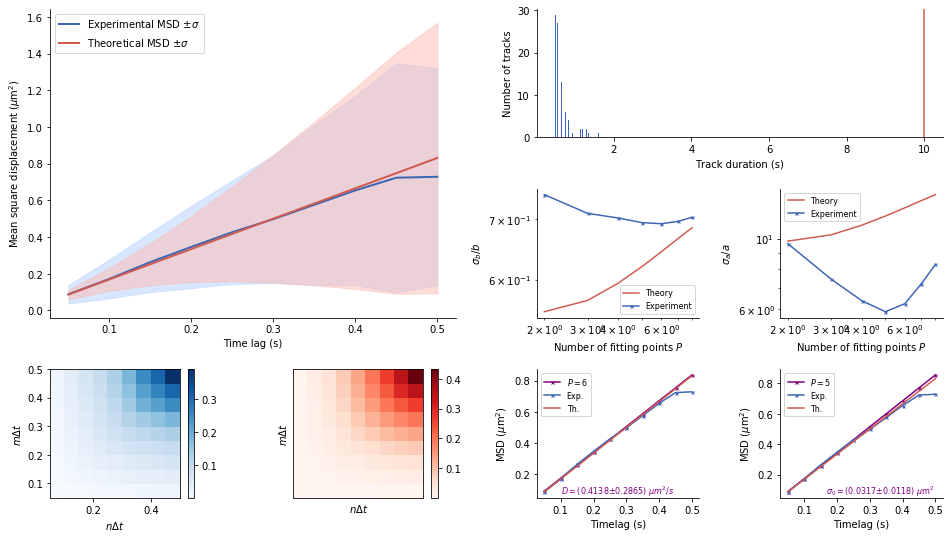

In [88]:
MSD = df['MSD'][(df['alpha']>0.8) & (df['alpha']<1.2)].values
Michalet(MSD,cutoff=0.5)

Text(0.5, 1, 'Minframe = 15')

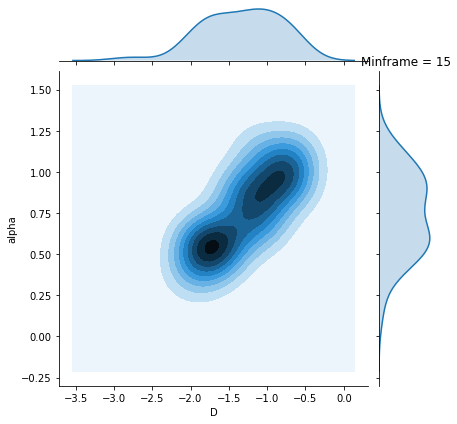

In [312]:
minframe=15
maxframe=500
file = ["Data/embryo.csv"]
DATA = data_pool(file,dt,minframe,maxframe,rsquared_threshold,fit_option=3)
df = pd.DataFrame(DATA,columns=['alpha', 'D', 'c','N','ID','x','y','MSD','Filename'])
df['D'] = df['D'].map(lambda d: np.log10(d))
sns.jointplot(x="D", y="alpha", data=df,kind='kde')
#df['D'].hist()
#plt.xlim(-3,0.5)
plt.title('Minframe = '+str(minframe))

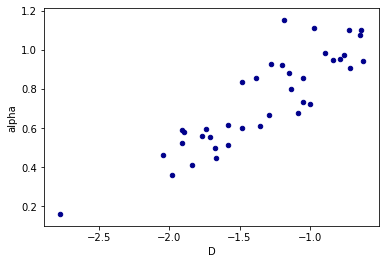

38


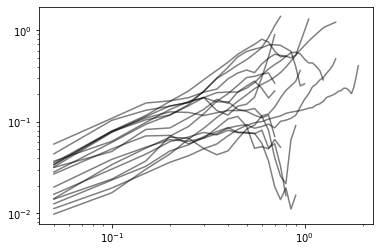

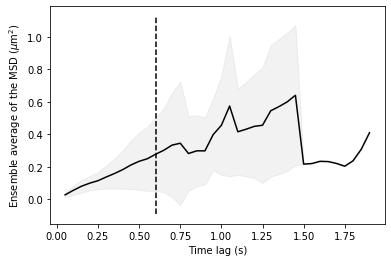

Initial run to determine the best theoretical values for D and sigma.
It is estimated that the lowest error will be for a number of fitting points P =  5  for which the relative error sigma/b =  0.7952753692773394
D =  0.1092
It is estimated that the lowest error will be when the number of fitting points P =  3  for which the relative error sigmaa/a =  0.014225237471907428
sigma =  0.0152
Second run with accurate values for D and sigma.
D =  0.1092
sigma =  0.0152
Done.


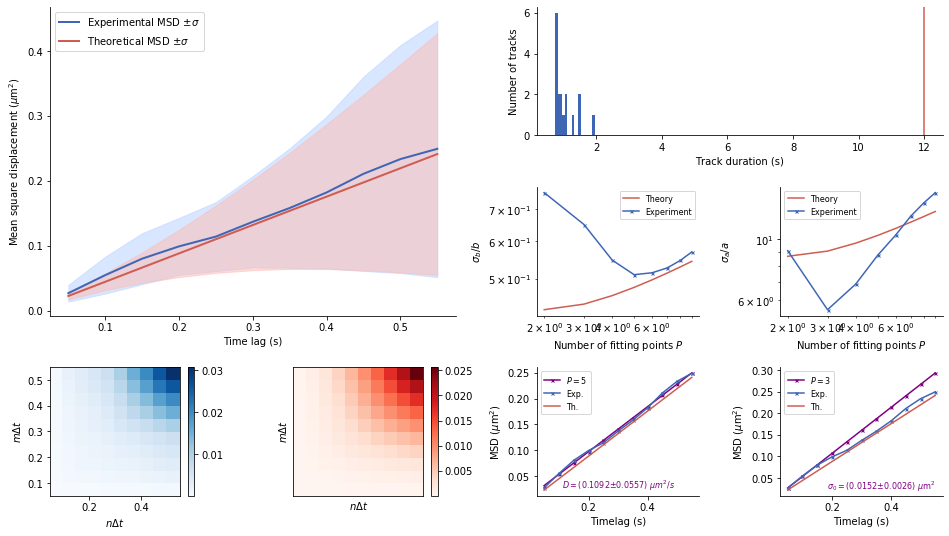

In [313]:
df.plot.scatter(x='D',y='alpha',c='DarkBlue')
plt.show()

print(len(df['D'].values))


MSD = list(df['MSD'][(df['alpha']>0.8) & (df['alpha']<1.2)].values)

for msd in MSD:
    plt.plot(np.linspace(dt,len(msd)*dt,len(msd)),msd,c='k',alpha=0.5)
    
plt.xscale('log')
plt.yscale('log')
plt.show()

Michalet(MSD,cutoff=0.6)


# LP184

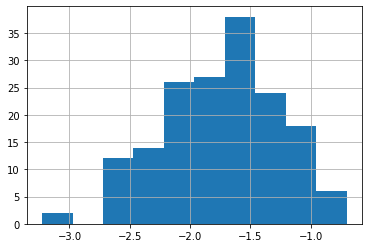

In [322]:
minframe = 25
files = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
DATA = data_pool(files,dt,minframe,maxframe,rsquared_threshold,fit_option=3)
df = pd.DataFrame(DATA,columns=['alpha', 'D', 'c','N','ID','x','y','MSD','Filename'])
df['D'] = df['D'].map(lambda d: np.log10(d))

df['D'].hist()